# Standing Ovation Problem

The Standing Ovation Problem can be stated as: 

"A brilliant economics lecture ends and the audience begins to applaud. The applause builds and tentatively, a few audience members may decide to stand. Does a standing ovation ensue or does the enthusiasm fizzle?"[1]

In this notebook, I will model the Standing Ovation Problem and predict the number of people in the audience who will stand up after the show/talk. For simplicity, the theater is considered as a square lattice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

47.0 % of the audience will stand immediately after the lecture


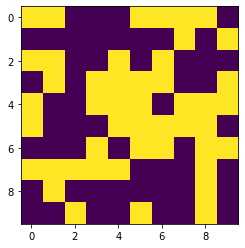

In [2]:
# theater size
N = 10          
time = 10    # max time step
Q = 0.8   # quality of presentation (0-1)

w1 = 0.5  #weight of introversion
w2 = 1-w1 #weight of impression

I = Q*(np.random.uniform(0,1,size=(N,N)))   # array representing how impressed the audience is

S = np.random.uniform(0,1,size=(N,N))       # array representing how shy the audience is

P = w1*S + w2*I                             #probability to stand-up

CT = np.round(np.random.uniform(1,5,size=(N,N))) # copying tolerance 

x = np.arange(N)
SO = np.zeros((N,N))

# the first people to stand
for i in x:
    for j in x:
        if (P[i,j]>0.5):
            SO[i,j]=1
        else:
            SO[i,j]=0

plt.figure()           
plt.imshow(SO)
print(np.sum(SO), '% of the audience will stand immediately after the lecture')

57.0 % of the audience will stand after ten iterations


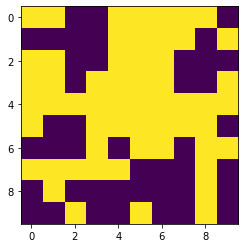

In [3]:
for t in (np.arange(time)):
    for i in x:
        for j in x:
            if (SO[i,j]==0): 
                if (i<9 and j==0):
                    neighbor = SO[i,j+1] + SO[i+1,j+1] + SO[i+1,j]
                elif (i<9 and j==9):
                    neighbor = SO[i,j-1] + SO[i+1,j-1] + SO[i+1,j]
                elif (i==9 and j>0 and j<9):
                    neighbor = SO[i,j-1] + SO[i,j+1]
                elif (i==9 and j==0):
                    neighbor = SO[i,j+1]
                elif (i==9 and j==9):
                    neighbor = SO[i,j-1]
                else:
                    neighbor = SO[i,j-1] + SO[i,j+1] + SO[i+1,j-1]+ SO[i+1,j+1] + SO[i+1,j]
                
                if (neighbor > CT[i,j]):
                    SO[i,j]=1
                else:
                    SO[i,j]=0
            else:
                SO[i,j]=1
plt.figure()
plt.imshow(SO)
print(np.sum(SO), '% of the audience will stand after ten iterations')

The model parameters (time{number of iterations}, Q{quality of performance}, w1{weight of introversion} and CT {copying tolerance}) may be varied to check how it will affect the dynamics of the system (i.e. number of people who will do the standing ovation). 

### Reference
[1] Miller J H & Page S E (2004) The Standing Ovation Problem. Complexity 9(5), pp. 8-16.